# **Real-time fraud prevention**

**Objective:**
1) Develop an advanced machine learning model capable of detecting and predicting fraudulent transactions in real-time with a high degree of accuracy and efficiency.
2) Implement sophisticated algorithms and techniques to identify subtle patterns and anomalies within the transaction data, enabling the model to proactively recognize potentially fraudulent activities.
3) Contribute to the ongoing efforts in financial security and risk management by creating a robust framework that can significantly reduce the impact of fraudulent transactions on businesses and customers alike.
4) Establish a reliable and scalable solution that can adapt to the evolving landscape of financial fraud, providing a proactive defense mechanism against increasingly sophisticated fraudulent activities in the digital payment ecosystem.

**Dataset Explanation:**
    
1. trans_date_trans_time: Timestamp of the transaction
2. merchant: Name of the merchant involved in the transaction
3. category: Category of the transaction
4. amt: Amount of the transaction
5. first: First name of the customer
6. last: Last name of the customer
7. gender: Gender of the customer
8. street: Customer's street address
9. city: Customer's city of residence
10. state: Customer's state of residence
11. zip: Customer's ZIP code
12. lat: Latitude coordinate
13. long: Longitude coordinate
14. city_pop: Population of the customer's city
15. job: Occupation of the customer
16. dob: Date of birth of the customer
17. trans_num: Transaction number
18. unix_time: Unix timestamp of the transaction
19. merch_lat: Latitude of the merchant's location
20. merch_long: Longitude of the merchant's location
21. Avg. Transaction Freq. Per day: Average transaction frequency per day
22. Avg. Transaction Freq. Per week: Average transaction frequency per week
23. Avg. Transaction Freq. Per month: Average transaction frequency per month
24. Transaction velocity: Velocity of the transaction
25. is_fraud: Target variable indicating whether the transaction is fraudulent or not.

Understanding these attributes will be critical for the development and evaluation of the machine learning model for fraud detection

# Exploratory Data Analysis (EDA)

- The purpose of this EDA is to gain valuable insights and understand the patterns within the dataset related to financial transactions.
- The dataset contains comprehensive information, including transaction details, customer information, geographical data, and transaction frequencies.
- The primary goal is to identify any anomalies, irregularities, and meaningful patterns that can guide the development of an effective predictive model for fraud detection.
- The EDA process will involve structured steps, including an examination of the datasets structure, checking for missing values, understanding data types, and analyzing the distribution of key variables.
- Visualizations will be utilized to better understand the data distribution and potential relationships between different features.
- The ultimate objective is to establish a solid foundation for subsequent data preprocessing and model development, facilitating the creation of a robust fraud detection model.

#### Step 1. Import the necessary modules

In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [5]:
pd.options.display.max_rows=999
pd.options.display.max_columns=999

#### Step 2. Load the dataset

In [6]:
df=pd.read_excel('fraudTrain-Final.xlsx')

In [1]:
df.columns

NameError: name 'df' is not defined

In [7]:
df.head()

,S.no,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,Avg. Transaction Freq. Per day,Avg. Transaction Freq. Per week,Avg. Transaction Freq. Per month,Transaction velocity,is_fraud
0,0,2019-01-01 00:00:18,2703186189652090,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,3.809764,26.668348,114.292920,High,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,5.721548,40.050834,171.646433,High,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0.915632,6.409422,27.468951,Low,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0.908730,6.361110,27.261898,Low,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,3.789059,26.523411,113.671763,High,0


#### Step 3: Exploring the structure of the dataset

In [8]:
print("\nDataset dimensions: ", df.shape)


Dataset dimensions:  (1048575, 27)


In [9]:
print(df.columns)

Index(['S.no', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'Avg. Transaction Freq. Per day',
       'Avg. Transaction Freq. Per week', 'Avg. Transaction Freq. Per month',
       'Transaction velocity', 'is_fraud'],
      dtype='object')


#### Step 4: Check for missing values

In [10]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
S.no                                0
trans_date_trans_time               0
cc_num                              0
merchant                            0
category                            0
amt                                 0
first                               0
last                                0
gender                              0
street                              0
city                                0
state                               0
zip                                 0
lat                                 0
long                                0
city_pop                            0
job                                 0
dob                                 0
trans_num                           0
unix_time                           0
merch_lat                           0
merch_long                          0
Avg. Transaction Freq. Per day      0
Avg. Transaction Freq. Per week     0
Avg. Transaction Freq. Per month    0
Transaction veloci

#### Step 5: Summarize numerical columns

In [11]:
df.describe()

,S.no,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,Avg. Transaction Freq. Per day,Avg. Transaction Freq. Per week,Avg. Transaction Freq. Per month,is_fraud
count,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.242870e+05,2019-08-14 03:47:51.826506496,4.171565e+17,7.027910e+01,4.880159e+04,3.853336e+01,-9.022626e+01,8.905776e+04,1973-09-23 10:23:35.157141776,1.344906e+09,3.853346e+01,-9.022648e+01,3.384281e+00,2.368997e+01,1.015284e+02,5.727773e-03
min,0.000000e+00,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.325376e+09,1.902779e+01,-1.666712e+02,1.610407e-02,1.127285e-01,4.831222e-01,0.000000e+00
25%,2.621435e+05,2019-05-10 20:39:13,1.800400e+14,9.640000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,1.336682e+09,3.472954e+01,-9.689864e+01,2.670976e+00,1.869683e+01,8.012928e+01,0.000000e+00
50%,5.242870e+05,2019-08-13 23:45:21,3.520550e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-10-11 00:00:00,1.344902e+09,3.936295e+01,-8.743923e+01,3.699336e+00,2.589535e+01,1.109801e+02,0.000000e+00
75%,7.864305e+05,2019-12-01 12:46:52,4.642255e+15,8.305000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-14 00:00:00,1.354366e+09,4.195602e+01,-8.023228e+01,4.679384e+00,3.275569e+01,1.403815e+02,0.000000e+00
max,1.048574e+06,2020-03-10 16:08:50,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,1.362932e+09,6.751027e+01,-6.695090e+01,5.903294e+00,4.132306e+01,1.770988e+02,1.000000e+00
std,3.026977e+05,NaN,1.308811e+18,1.599518e+02,2.689804e+04,5.076852e+00,1.375858e+01,3.024351e+05,NaN,1.019700e+07,5.111233e+00,1.377093e+01,1.381146e+00,9.668019e+00,4.143437e+01,7.546503e-02


#### Step 6:Explore the distribution of the target variable

In [12]:
# Check the distribution of the target variable
print("\nDistribution of the target variable:")
print(df['is_fraud'].value_counts())



Distribution of the target variable:
is_fraud
0    1042569
1       6006
Name: count, dtype: int64


#### The data set has a significant imbalance and requires balancing before employing it for ML model training.

#### Step 7: Visualize key features

#### Fraud distribution

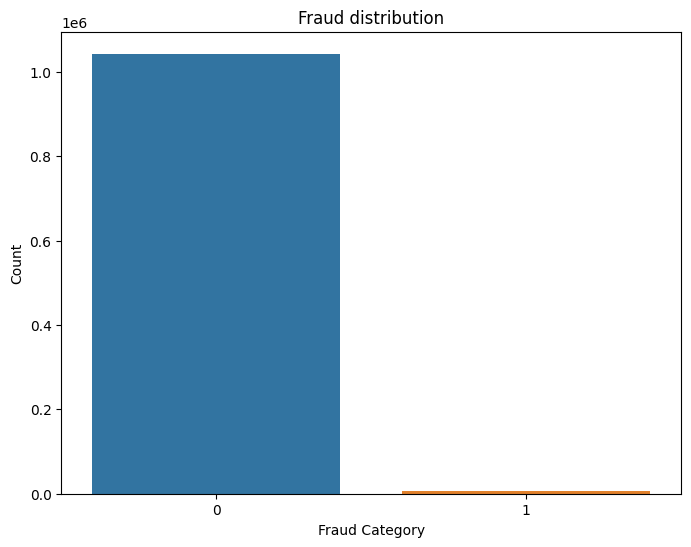

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_fraud')
plt.title('Fraud distribution')
plt.xlabel('Fraud Category')
plt.ylabel('Count')
plt.show()


#### Spending Category vs Fraud

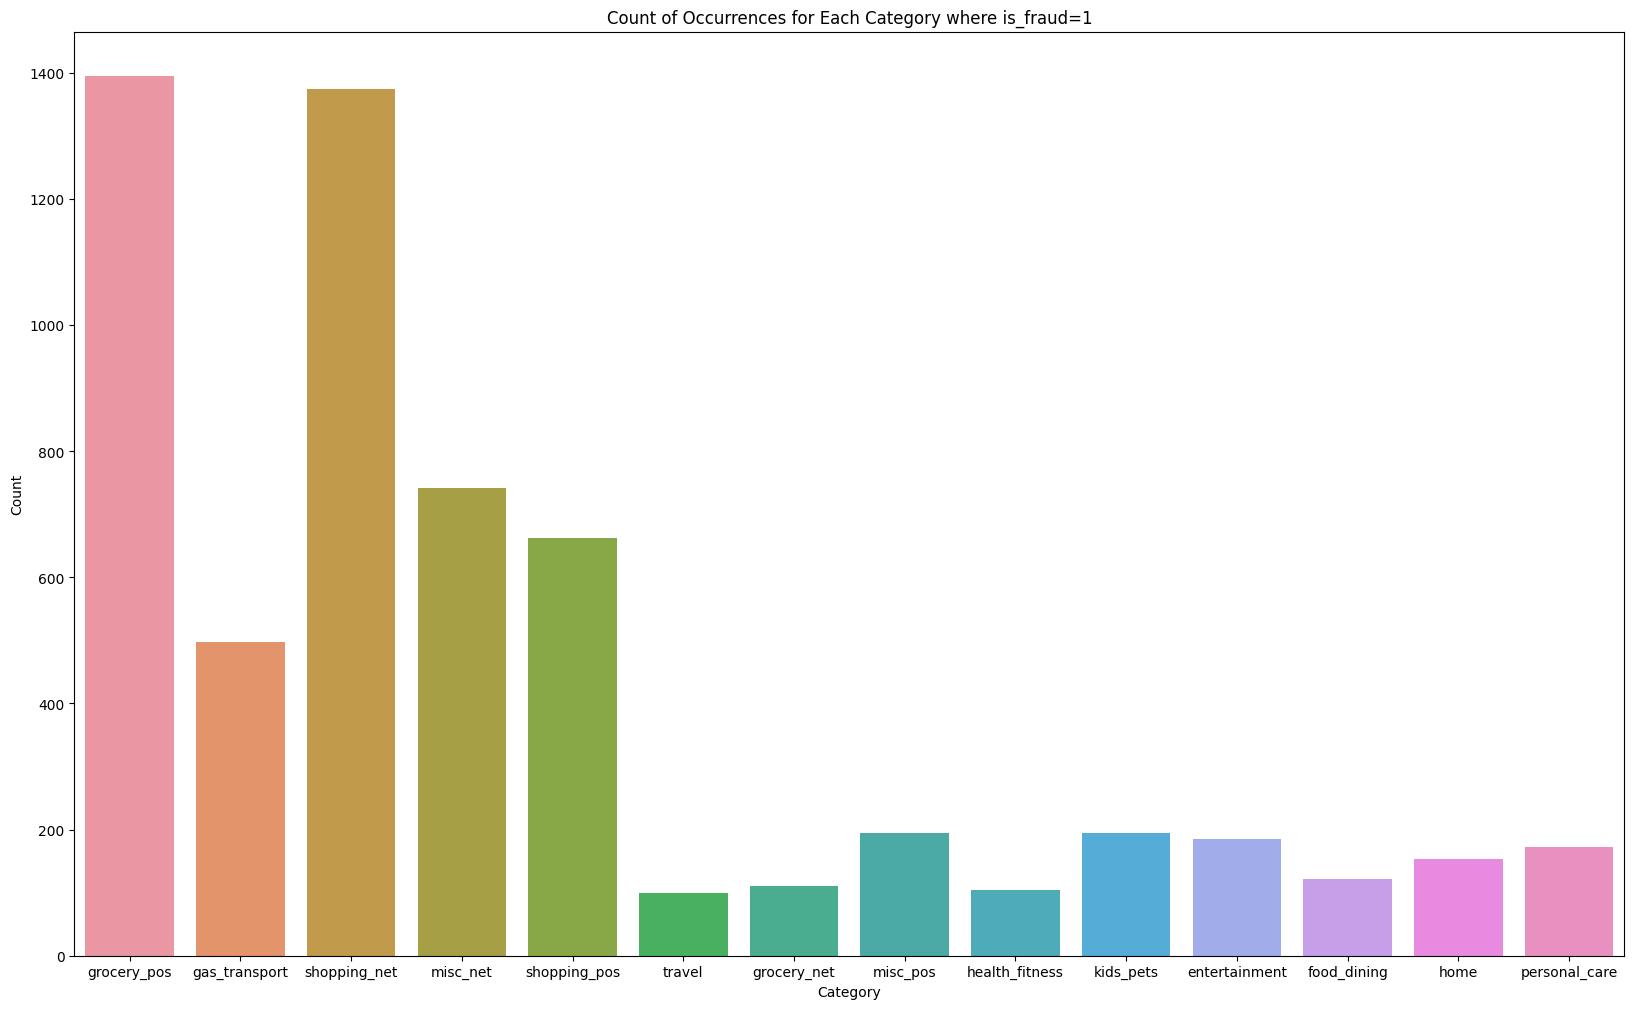

In [14]:
fraud_df = df[df['is_fraud'] == 1]

plt.figure(figsize=(20, 12))
sns.countplot(data=fraud_df, x='category')
plt.title('Count of Occurrences for Each Category where is_fraud=1')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


#### Transaction Amount by Fraud Status/Gender

C:\Users\in22labs_DA1\AppData\Local\Temp\ipykernel_38864\1586343458.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='is_fraud', y='amt', data=df,palette=['violet'])


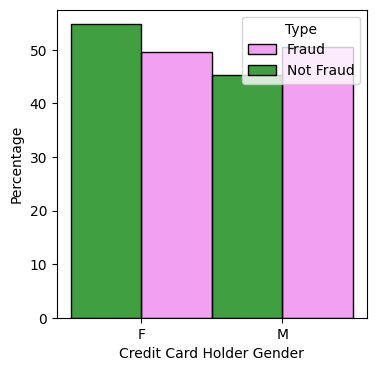

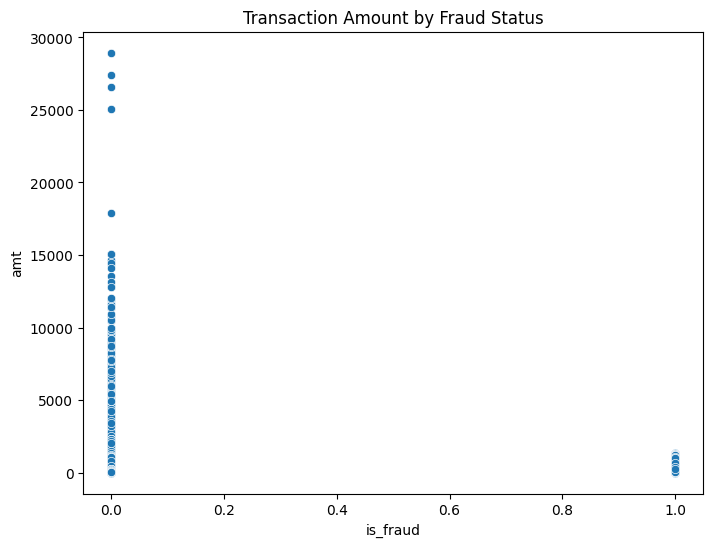

In [15]:
plt.figure(figsize=(4, 4))
ax=sns.histplot(x='gender',data=df, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,palette=['green', 'violet'])
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='is_fraud', y='amt', data=df,palette=['violet'])
plt.title('Transaction Amount by Fraud Status')
plt.show()

In [16]:

df[df['is_fraud']==1].describe()['amt']['max']

1371.81

In [17]:
df[df['is_fraud']==0].describe()['amt']['max']

28948.9

The maximum amount involved in fradualent transaction is just $ 1371 the maximum amount involved in non fraudulent transaction is $28948.9 while  which implies that the data is imbalanced

In [18]:
np.percentile(df['amt'],99)

544.8852000000002

As there are extreme outliers in transaction amount, and the 99 percentile is around $546, we subset the data for any transaction amounts below \$1,000 to make the visualizations more readable.

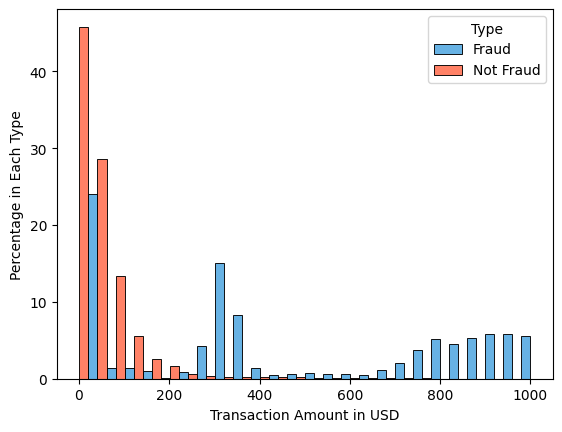

In [19]:
ax=sns.histplot(x='amt',data=df[df.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25,palette=['#FF5733', '#3498DB'])
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#### Age vs Fraud

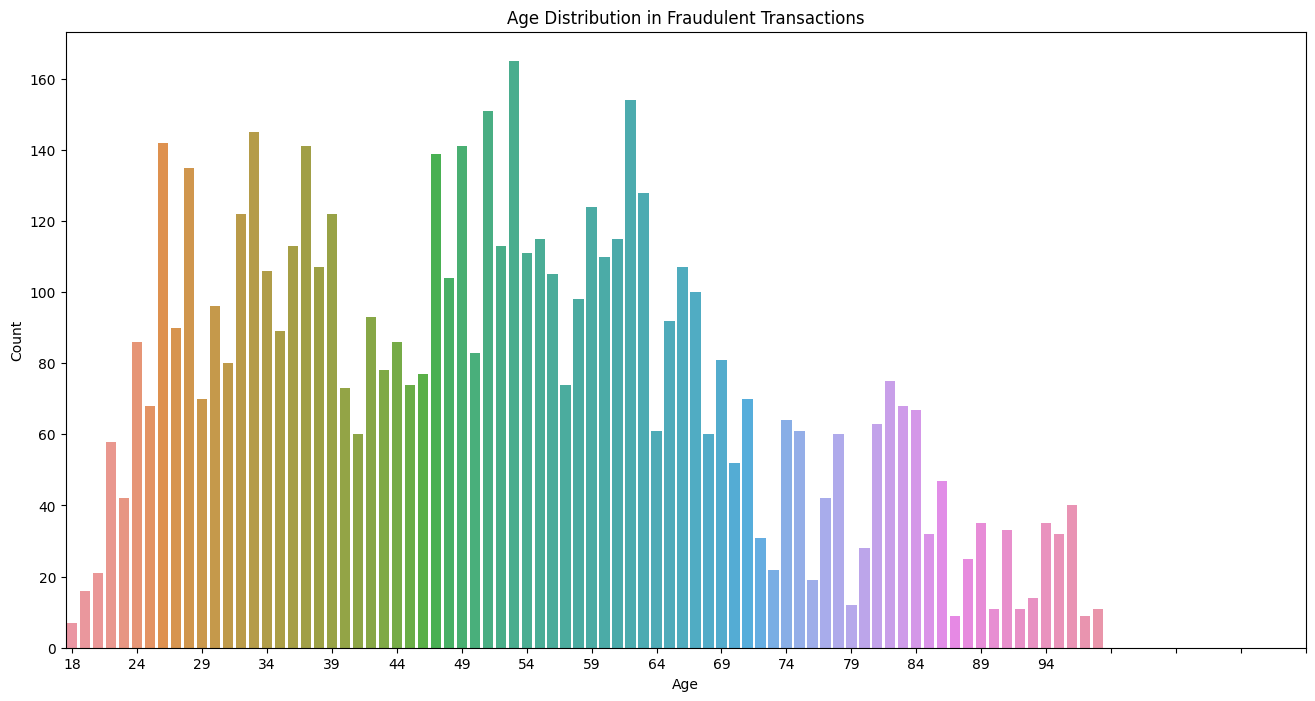

In [20]:
plt.figure(figsize=(16, 8))

df['age'] = dt.date.today().year - pd.to_datetime(df['dob']).dt.year
fraud_df = df[df['is_fraud'] == 1]
# Create the count plot
ax = sns.countplot(x='age', data=fraud_df)

# Set the labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Count')
plt.xticks(np.arange(0, 100, 5))
plt.title('Age Distribution in Fraudulent Transactions')

# Add legend
#plt.legend(title='Type', labels=['Fraud'])

# Show the plot
plt.show()



#### Cyclicality of Fraud

In [21]:
df['age']

0          35
1          45
2          61
3          56
4          37
           ..
1048570    80
1048571    24
1048572    71
1048573    33
1048574    26
Name: age, Length: 1048575, dtype: int32

In [22]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], format='%d-%m-%Y %H:%M')

#### Time in a day vs fraud

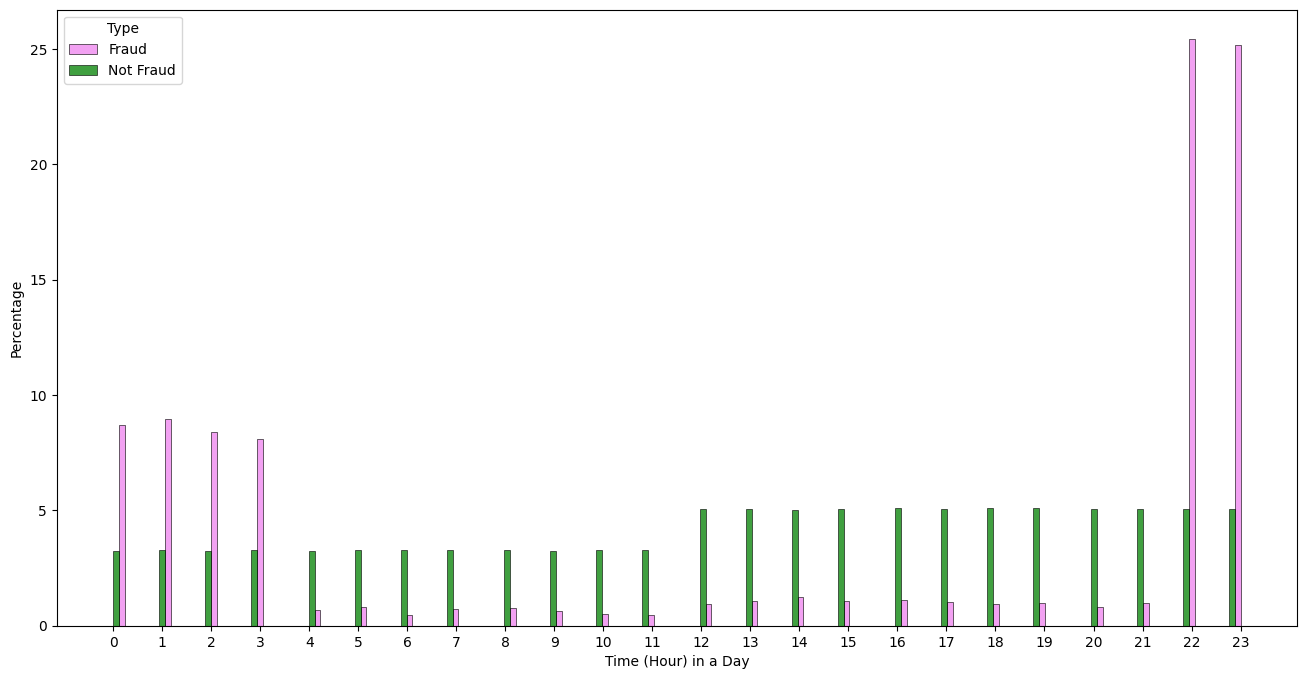

In [23]:
plt.figure(figsize=(16, 8))
df['hour']=pd.to_datetime(df['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',palette=['green', 'violet'])
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#### Day of week vs fraud

C:\Users\in22labs_DA1\AppData\Local\Temp\ipykernel_38864\111839320.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


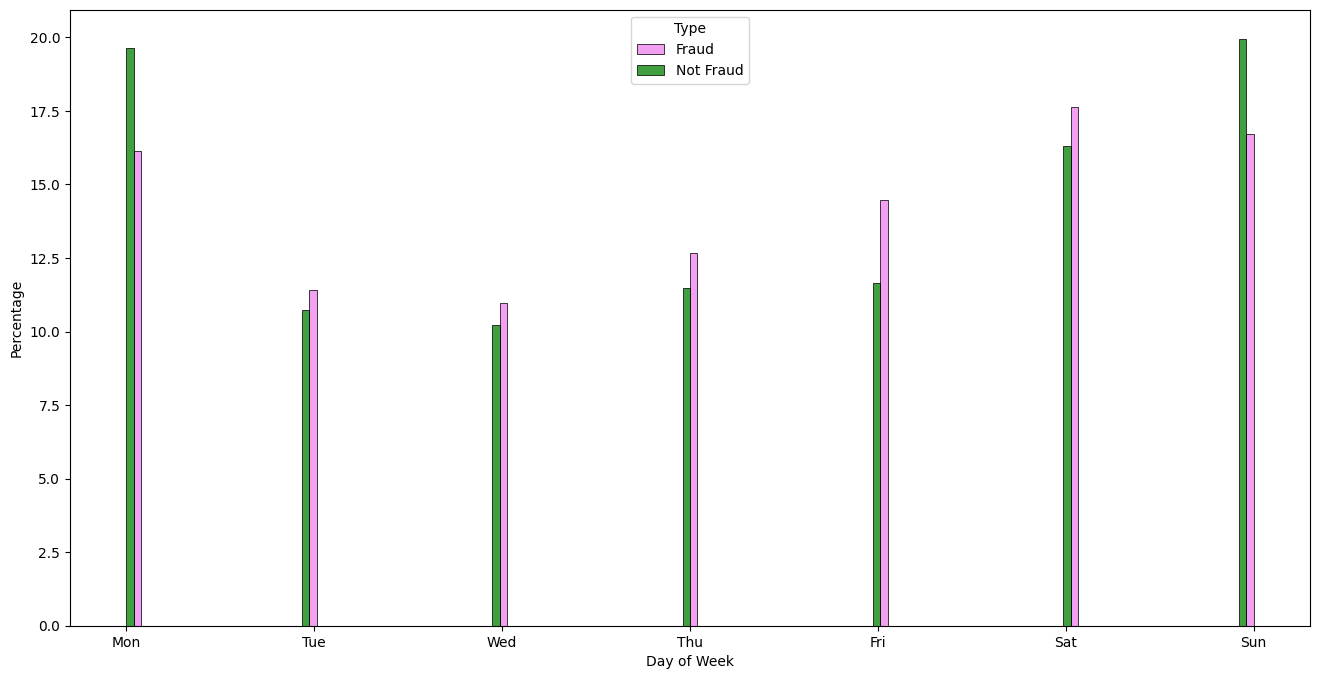

In [24]:
plt.figure(figsize=(16, 8))
df['day']=pd.to_datetime(df['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',palette=['green', 'violet'])
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#### Month vs fraud

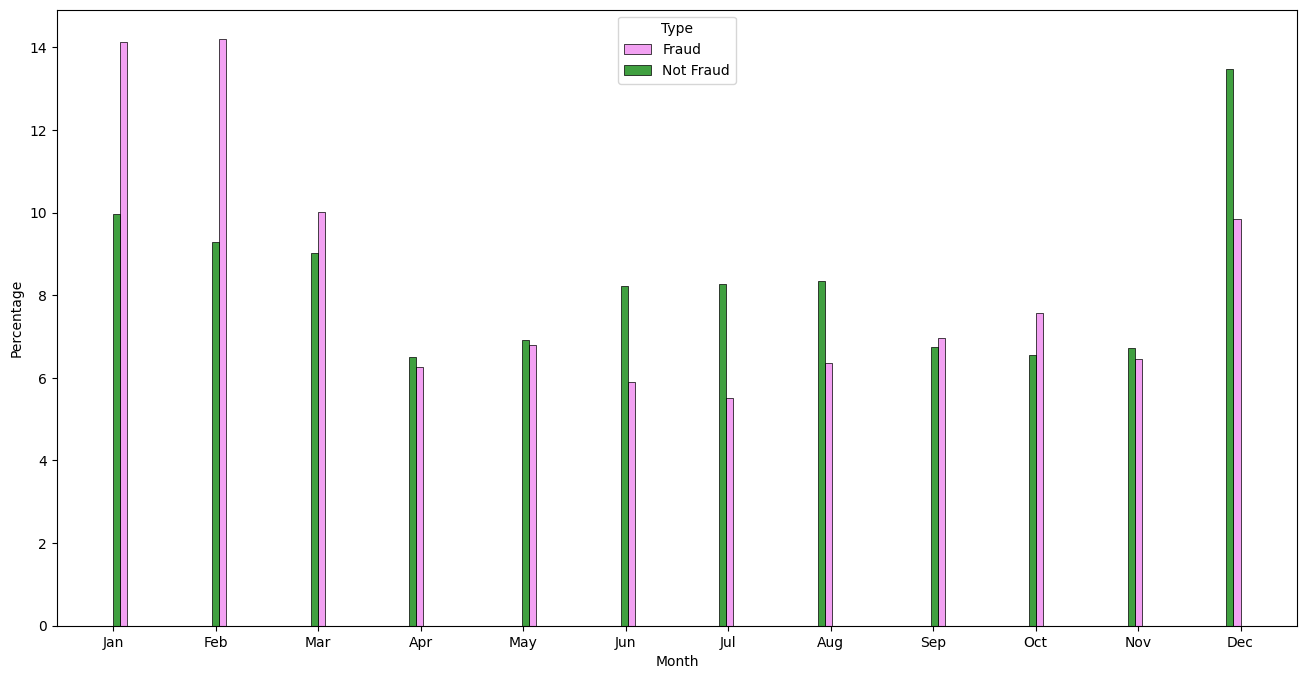

In [25]:
plt.figure(figsize=(16, 8))
df['month']=pd.to_datetime(df['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',palette=['green', 'violet'])
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

#### Transaction velocity vs fraud

C:\Users\in22labs_DA1\AppData\Local\Temp\ipykernel_38864\369214696.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["High","Medium","Low"])


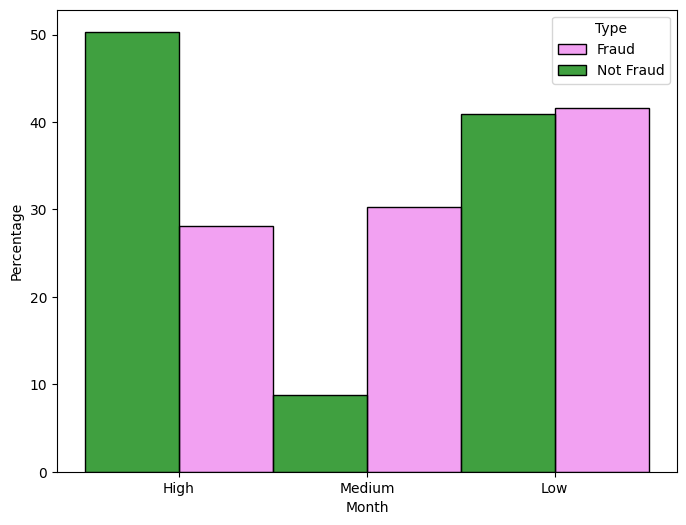

In [26]:
plt.figure(figsize=(8, 6))
ax=sns.histplot(data=df, x="Transaction velocity", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge',palette=['green', 'violet'])
ax.set_xticklabels(["High","Medium","Low"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')

plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

# Outlier Treatment

#### Dropping unwanted column 

In [27]:
df.drop(columns=['S.no','trans_date_trans_time','merchant','first','last','street','cc_num','zip','lat','long','job','dob','trans_num','unix_time','merch_lat','merch_long'],inplace=True)

In [28]:
df.columns

Index(['category', 'amt', 'gender', 'city', 'state', 'city_pop',
       'Avg. Transaction Freq. Per day', 'Avg. Transaction Freq. Per week',
       'Avg. Transaction Freq. Per month', 'Transaction velocity', 'is_fraud',
       'age', 'hour', 'day', 'month'],
      dtype='object')

In [29]:
numerical_columns = df.select_dtypes(include=[int, float]).columns
numerical_columns

Index(['amt', 'city_pop', 'Avg. Transaction Freq. Per day',
       'Avg. Transaction Freq. Per week', 'Avg. Transaction Freq. Per month',
       'is_fraud', 'age', 'hour', 'day', 'month'],
      dtype='object')

<Axes: >

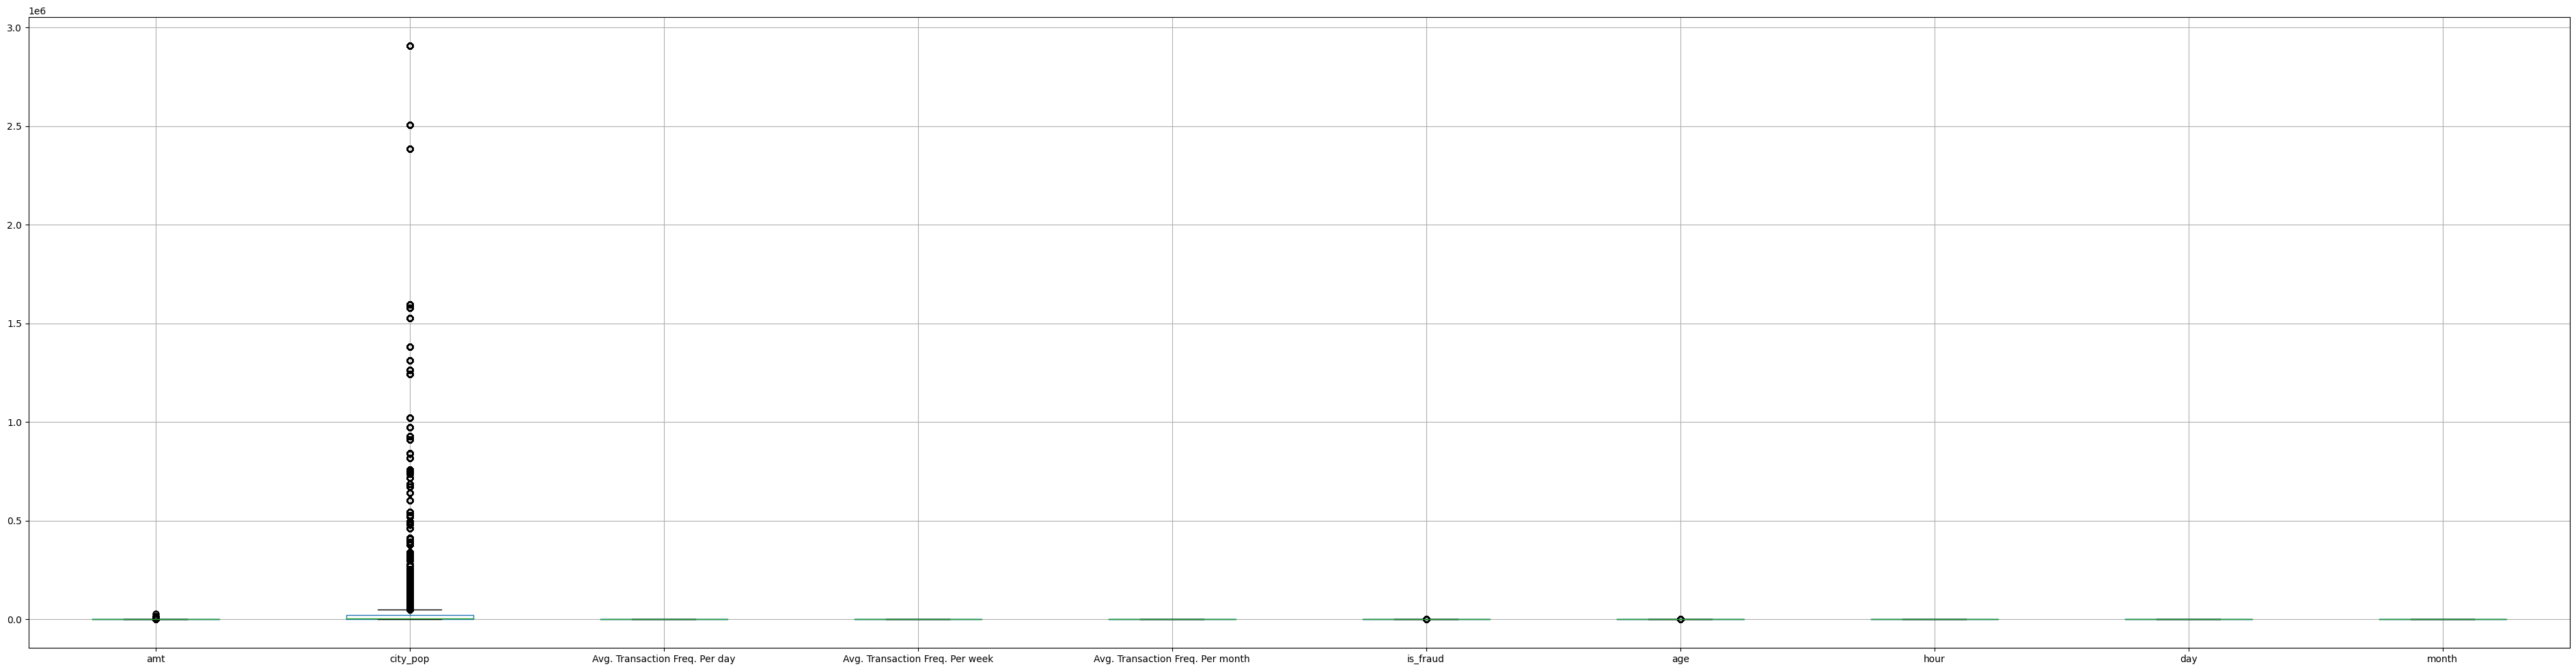

In [30]:
plt.figure(figsize=(48, 12))
df.boxplot()

<Axes: >

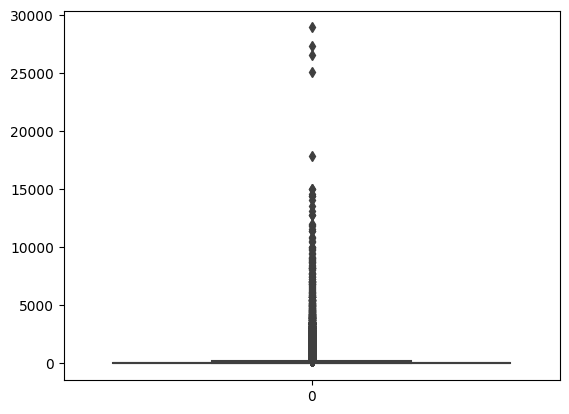

In [31]:
sns.boxplot(df['amt'])

Looking at the box plot, it seems that the amt column has outlier.

These outliers value needs to be teated and there are several ways of treating them:

- Drop the outlier value
- Replace the outlier value using the IQR

### Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.

In [32]:
def remove_outlier(col):  #define a function to detect the outlier
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [33]:
lrincome,urincome = remove_outlier(df['amt']) #return upperlimit and lowerlimit for Income
df['amt']=np.where(df['amt']>urincome, urincome, df['amt']) #upperlimit capping
df['amt']=np.where(df['amt']<lrincome, lrincome, df['amt']) #lowerlimit capping
#overwritting the column income

# Make Boxplots after Outlier Treatment

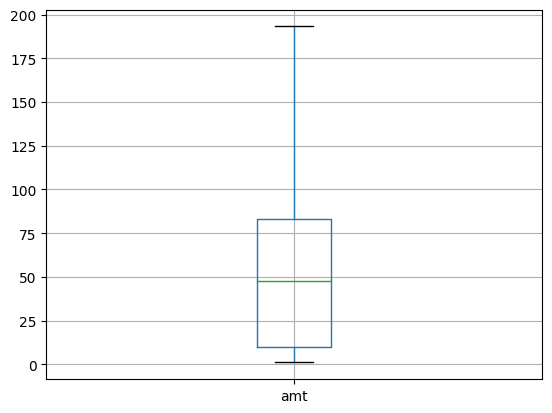

In [34]:
df.boxplot(column=['amt'])
plt.show()

### If you look at the box plots above,after treating the outlier there are no outliers in all these columns.

# Univariate Analysis

In [35]:
df['month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

C:\Users\in22labs_DA1\AppData\Local\Temp\ipykernel_38864\2242855751.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax1)


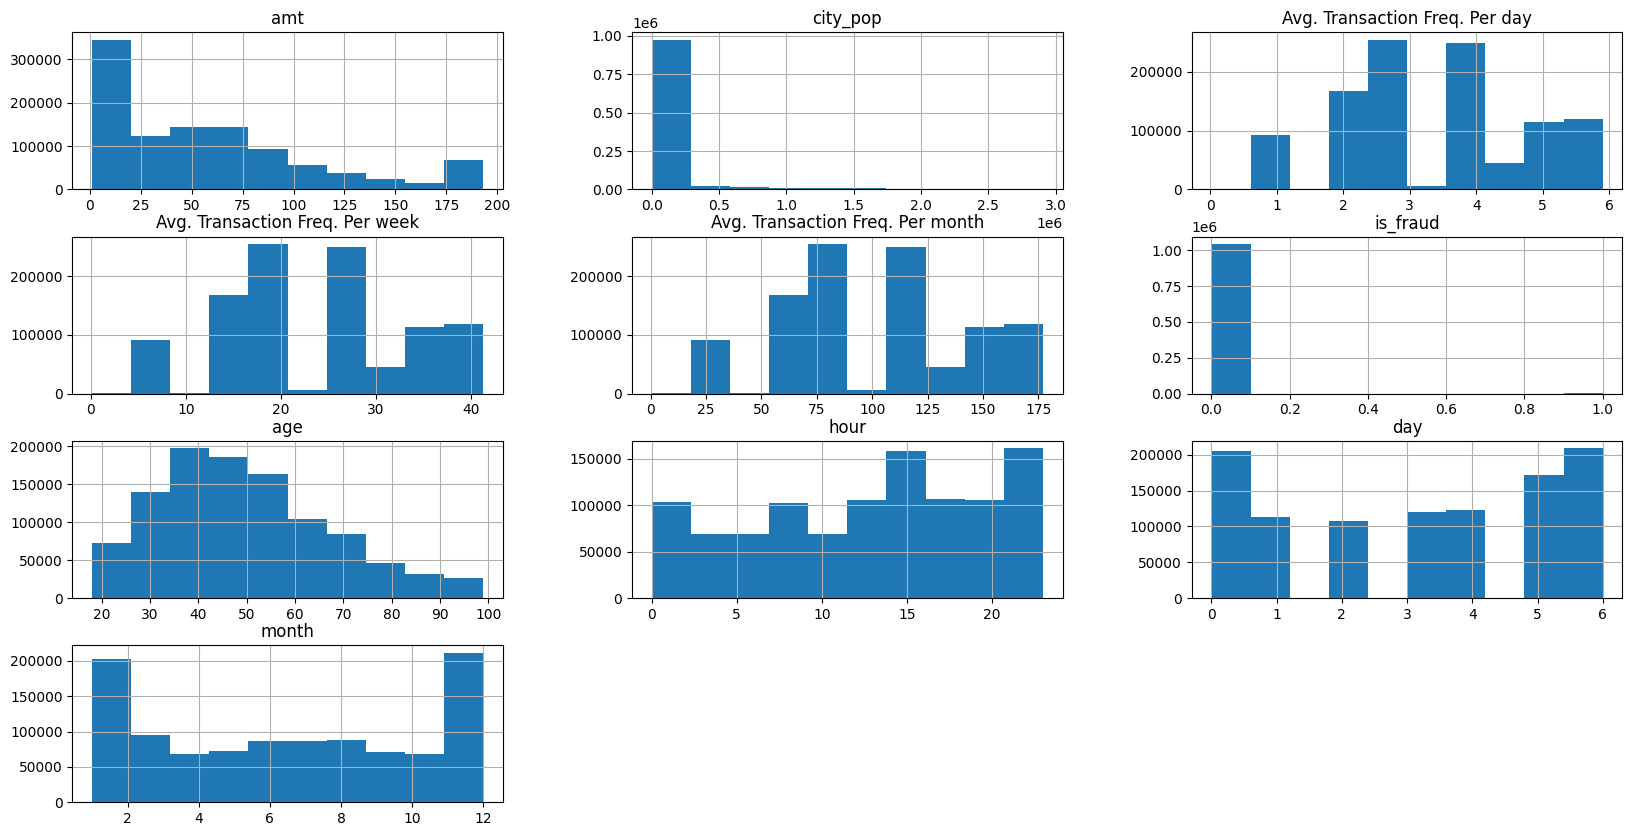

In [36]:
fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.gca()
df.hist(ax = ax1)
plt.show()

# Bivariate Analysis

c:\Users\in22labs_DA1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


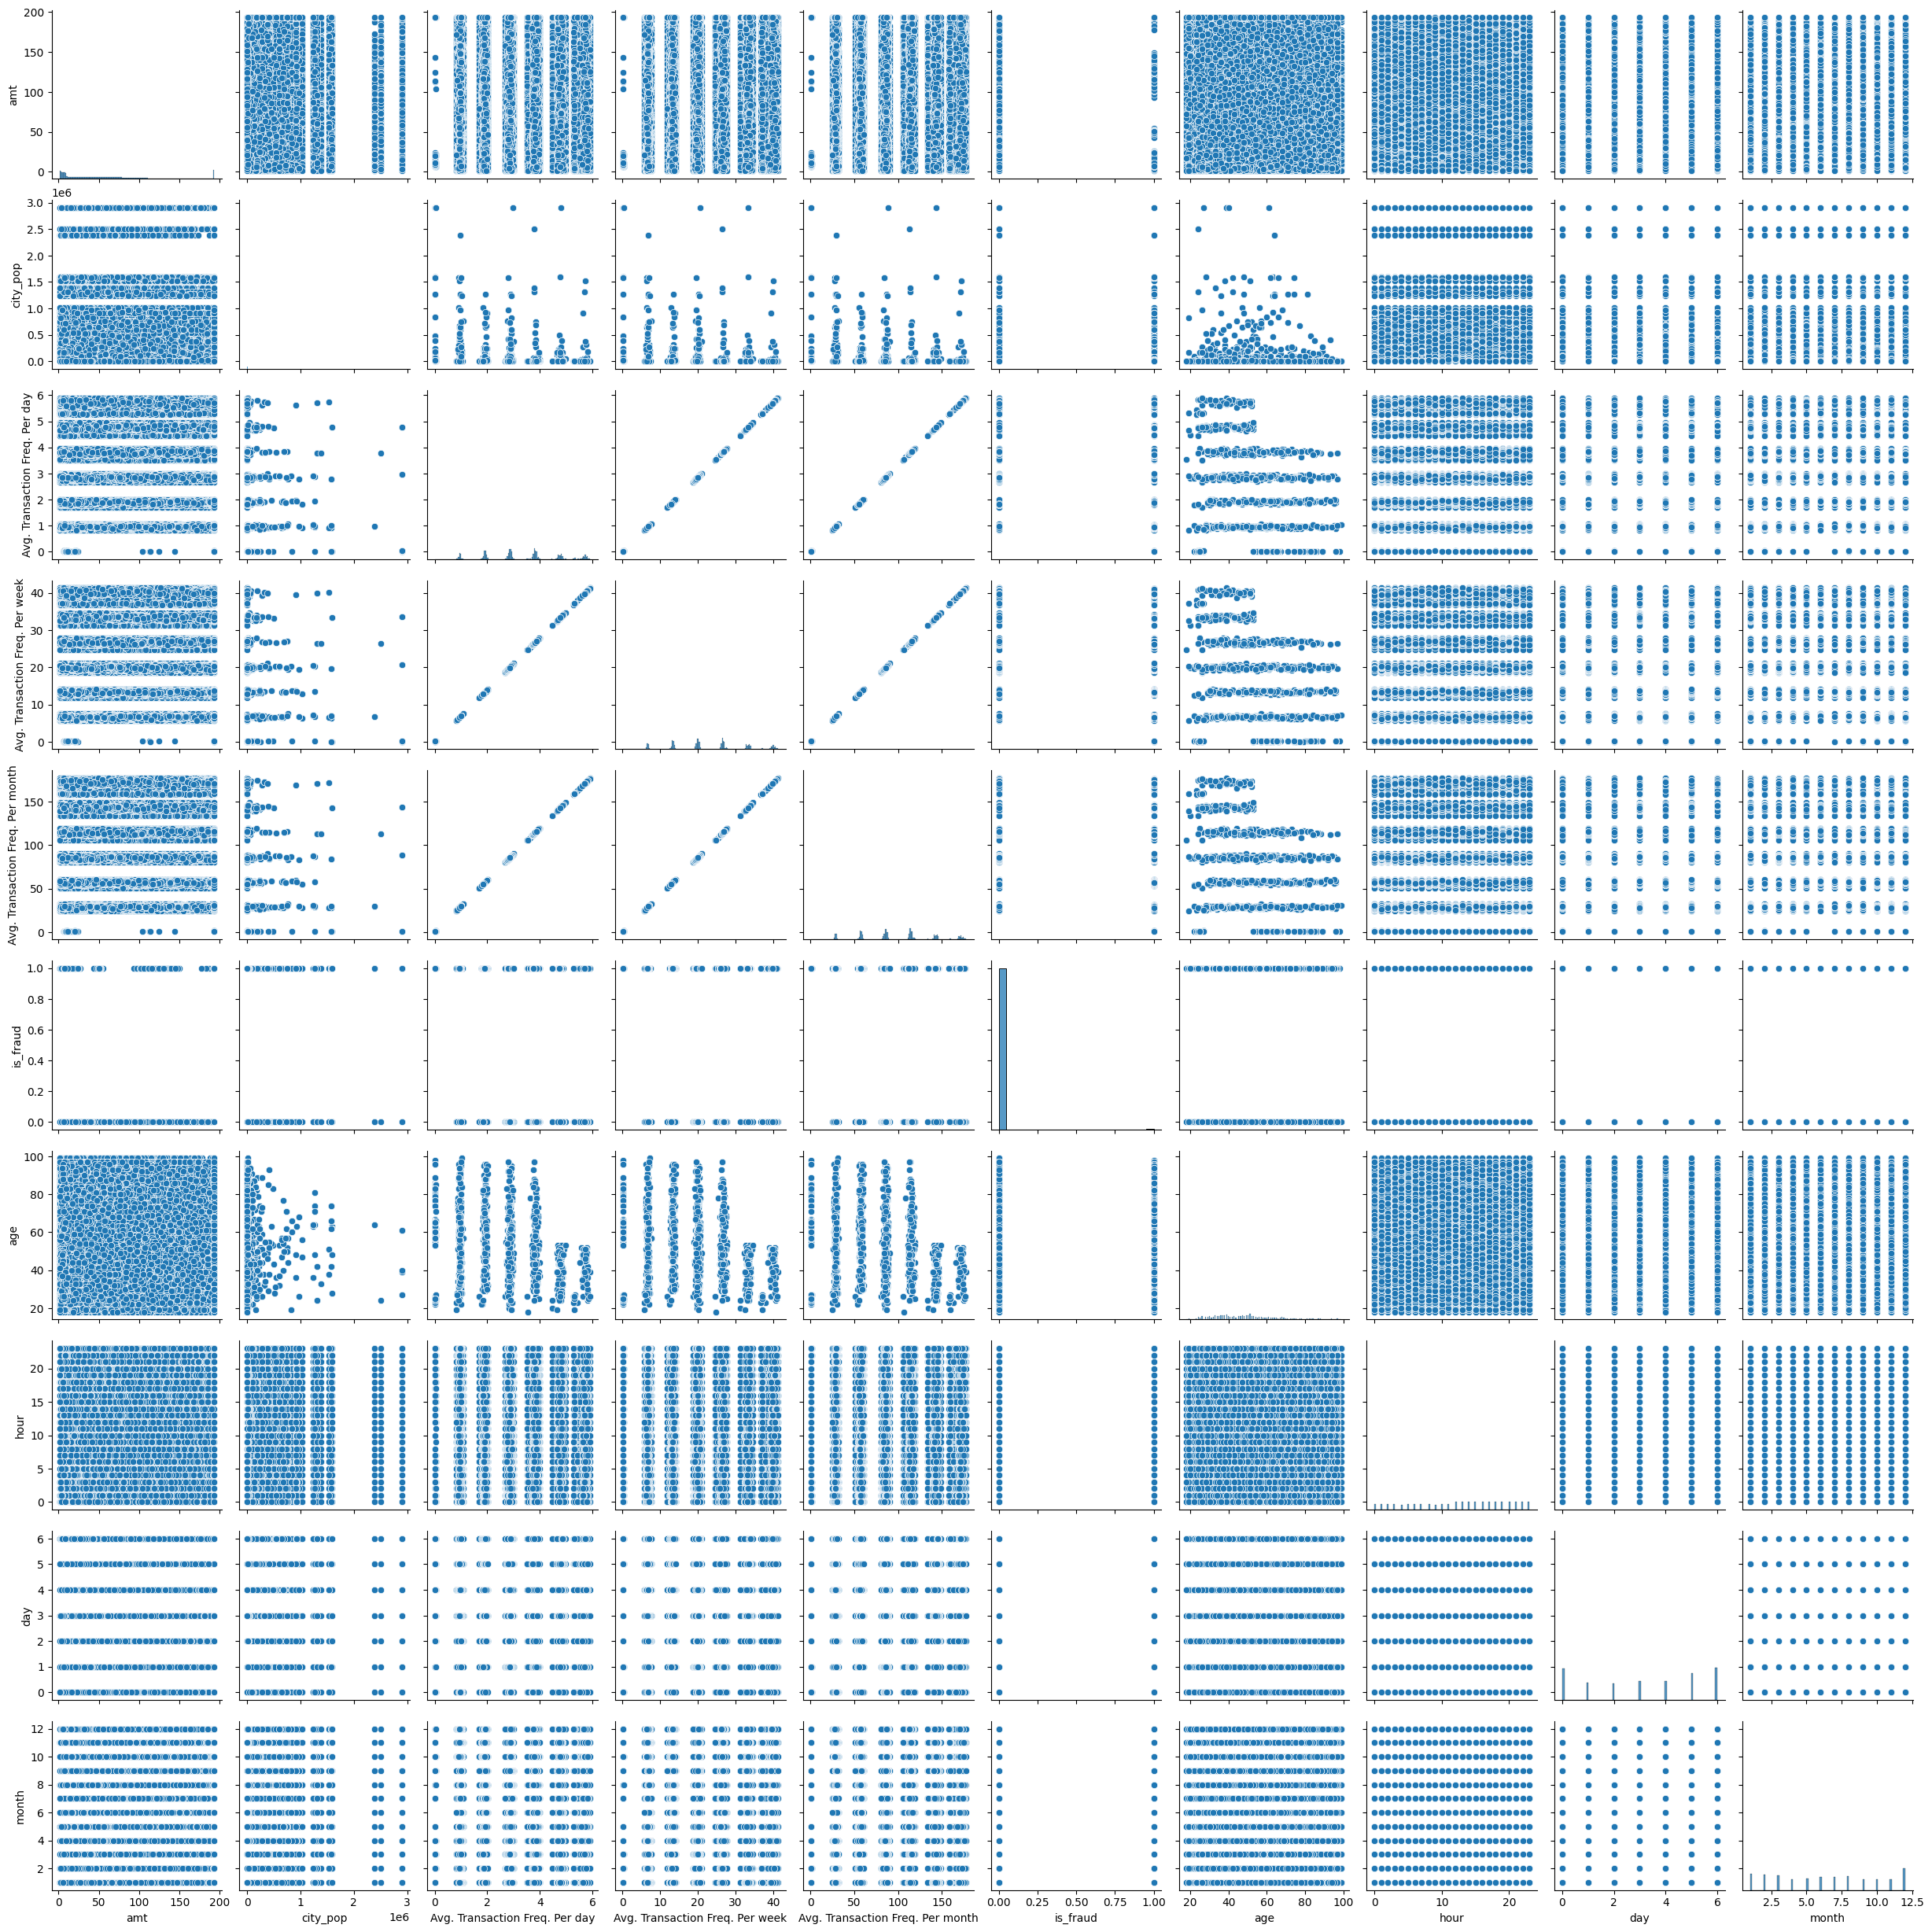

In [37]:
sns.pairplot(df)
plt.show()

In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.

The variables are non-normal so normality assumption is not met

From scatter plot it is observed there is no linear relationship between the variable

## Correlation Heatmap

In [38]:
df[['amt', 'Avg. Transaction Freq. Per day','city_pop',
       'Avg. Transaction Freq. Per week', 'Avg. Transaction Freq. Per month',
       'is_fraud', 'age', 'hour', 'day', 'month']].corr()

,amt,Avg. Transaction Freq. Per day,city_pop,Avg. Transaction Freq. Per week,Avg. Transaction Freq. Per month,is_fraud,age,hour,day,month
amt,1.000000,-0.010647,0.006408,-0.010647,-0.010647,0.135323,-0.023370,-0.135421,-0.001748,-0.003115
Avg. Transaction Freq. Per day,-0.010647,1.000000,0.024541,1.000000,1.000000,-0.052226,-0.345282,0.109857,0.006737,-0.000142
city_pop,0.006408,0.024541,1.000000,0.024541,0.024541,0.001824,-0.091455,0.019883,0.002699,-0.000116
Avg. Transaction Freq. Per week,-0.010647,1.000000,0.024541,1.000000,1.000000,-0.052226,-0.345282,0.109857,0.006737,-0.000142
Avg. Transaction Freq. Per month,-0.010647,1.000000,0.024541,1.000000,1.000000,-0.052226,-0.345282,0.109857,0.006737,-0.000142
is_fraud,0.135323,-0.052226,0.001824,-0.052226,-0.052226,1.000000,0.010931,0.012416,0.001399,-0.013969
age,-0.023370,-0.345282,-0.091455,-0.345282,-0.345282,0.010931,1.000000,-0.172418,-0.015499,0.001507
hour,-0.135421,0.109857,0.019883,0.109857,0.109857,0.012416,-0.172418,1.000000,0.003350,0.000973
day,-0.001748,0.006737,0.002699,0.006737,0.006737,0.001399,-0.015499,0.003350,1.000000,0.030196
month,-0.003115,-0.000142,-0.000116,-0.000142,-0.000142,-0.013969,0.001507,0.000973,0.030196,1.000000


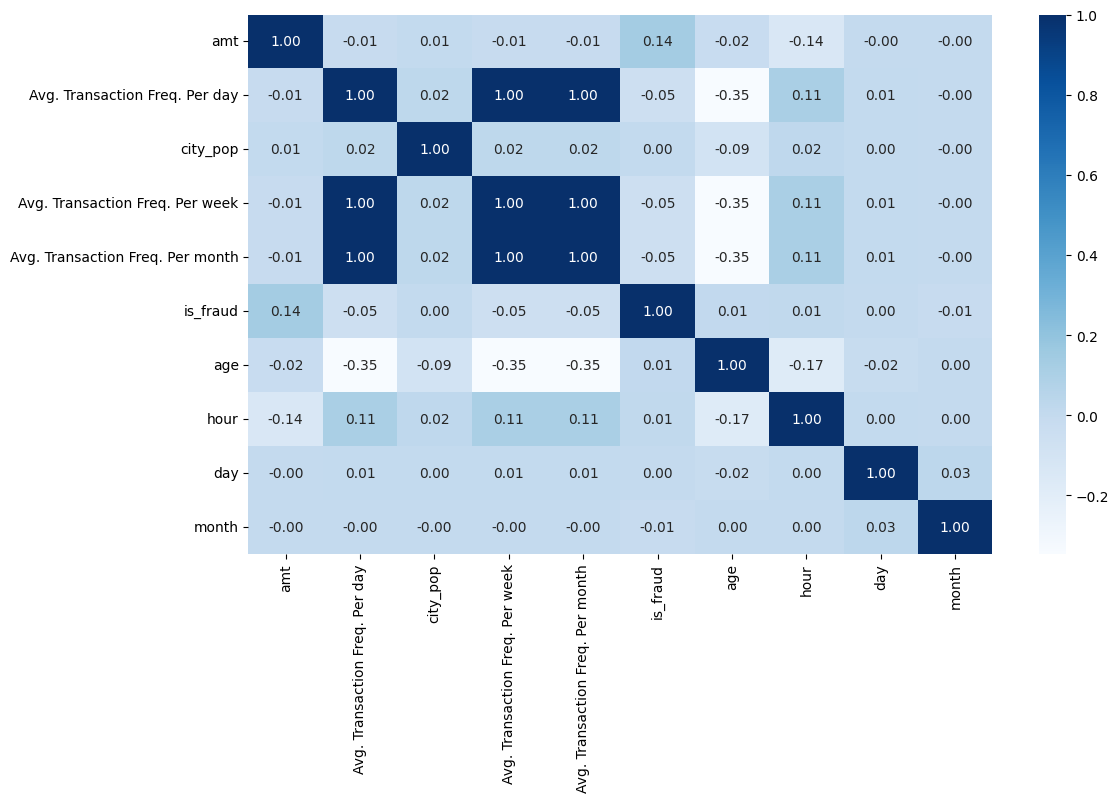

In [39]:
plt.figure(figsize=(12,7))
sns.heatmap(df[['amt', 'Avg. Transaction Freq. Per day','city_pop',
       'Avg. Transaction Freq. Per week', 'Avg. Transaction Freq. Per month',
       'is_fraud', 'age', 'hour', 'day', 'month']].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

In [40]:
df.describe()

,amt,city_pop,Avg. Transaction Freq. Per day,Avg. Transaction Freq. Per week,Avg. Transaction Freq. Per month,is_fraud,age,hour,day,month
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,5.781009e+01,8.905776e+04,3.384281e+00,2.368997e+01,1.015284e+02,5.727773e-03,4.977099e+01,1.280077e+01,3.135594e+00,6.514797e+00
std,5.309537e+01,3.024351e+05,1.381146e+00,9.668019e+00,4.143437e+01,7.546503e-02,1.736428e+01,6.816861e+00,2.200499e+00,3.668344e+00
min,1.000000e+00,2.300000e+01,1.610407e-02,1.127285e-01,4.831222e-01,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,1.000000e+00
25%,9.640000e+00,7.430000e+02,2.670976e+00,1.869683e+01,8.012928e+01,0.000000e+00,3.600000e+01,7.000000e+00,1.000000e+00,3.000000e+00
50%,4.745000e+01,2.456000e+03,3.699336e+00,2.589535e+01,1.109801e+02,0.000000e+00,4.800000e+01,1.400000e+01,3.000000e+00,7.000000e+00
75%,8.305000e+01,2.032800e+04,4.679384e+00,3.275569e+01,1.403815e+02,0.000000e+00,6.100000e+01,1.900000e+01,5.000000e+00,1.000000e+01
max,1.931650e+02,2.906700e+06,5.903294e+00,4.132306e+01,1.770988e+02,1.000000e+00,9.900000e+01,2.300000e+01,6.000000e+00,1.200000e+01


In [41]:
df.head()

,category,amt,gender,city,state,city_pop,Avg. Transaction Freq. Per day,Avg. Transaction Freq. Per week,Avg. Transaction Freq. Per month,Transaction velocity,is_fraud,age,hour,day,month
0,misc_net,4.970,F,Moravian Falls,NC,3495,3.809764,26.668348,114.292920,High,0,35,0,1,1
1,grocery_pos,107.230,F,Orient,WA,149,5.721548,40.050834,171.646433,High,0,45,0,1,1
2,entertainment,193.165,M,Malad City,ID,4154,0.915632,6.409422,27.468951,Low,0,61,0,1,1
3,gas_transport,45.000,M,Boulder,MT,1939,0.908730,6.361110,27.261898,Low,0,56,0,1,1
4,misc_pos,41.960,M,Doe Hill,VA,99,3.789059,26.523411,113.671763,High,0,37,0,1,1


In [42]:
df.drop('city',axis=1,inplace=True)

# Encoding the categorical values

In [43]:
cat_columns=['category','gender','state','Transaction velocity']

# Label Encoding
### Label encoding is a process that assigns a unique numerical label to each category in a categorical variable. It is useful for converting categorical data into a format that can be easily used for machine learning algorithms.

In [44]:
en = LabelEncoder()
for i in cat_columns:
    df[i]=en.fit_transform(df[i])

In [45]:
df.head()

,category,amt,gender,state,city_pop,Avg. Transaction Freq. Per day,Avg. Transaction Freq. Per week,Avg. Transaction Freq. Per month,Transaction velocity,is_fraud,age,hour,day,month
0,8,4.970,0,27,3495,3.809764,26.668348,114.292920,0,0,35,0,1,1
1,4,107.230,0,47,149,5.721548,40.050834,171.646433,0,0,45,0,1,1
2,0,193.165,1,13,4154,0.915632,6.409422,27.468951,1,0,61,0,1,1
3,2,45.000,1,26,1939,0.908730,6.361110,27.261898,1,0,56,0,1,1
4,9,41.960,1,45,99,3.789059,26.523411,113.671763,0,0,37,0,1,1


# Normalizing and Scaling

Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set Income is having values in thousands and age in just two digits. Since the data in these variables are of different scales, it is tough to compare these variables.

Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning algorithms.

In this method, we convert variables with different scales of measurements into a single scale.

StandardScaler normalizes the data using the formula (x-mean)/standard deviation.

We will be doing this only for the numerical variables.

Explore other scaling techniques.

In [46]:
std_scale = StandardScaler()
df['Avg. Transaction Freq. Per day']=std_scale.fit_transform(df[['Avg. Transaction Freq. Per day']])
df['Avg. Transaction Freq. Per month']=std_scale.fit_transform(df[['Avg. Transaction Freq. Per month']])
df['Avg. Transaction Freq. Per week']=std_scale.fit_transform(df[['Avg. Transaction Freq. Per week']])
df['city_pop']=-std_scale.fit_transform(df[['city_pop']])
df['age']=std_scale.fit_transform(df[['age']])
df['amt']=std_scale.fit_transform(df[['amt']])
df['day']=std_scale.fit_transform(df[['day']])
df['hour'] =std_scale.fit_transform(df[['hour']])
df['month']=std_scale.fit_transform(df[['month']])

In [47]:
df.head()

,category,amt,gender,state,city_pop,Avg. Transaction Freq. Per day,Avg. Transaction Freq. Per week,Avg. Transaction Freq. Per month,Transaction velocity,is_fraud,age,hour,day,month
0,8,-0.995193,0,27,0.282913,0.308065,0.308065,0.308065,0,0,-0.850654,-1.877811,-0.970505,-1.503349
1,4,0.930777,0,47,0.293977,1.692268,1.692268,1.692268,0,0,-0.274759,-1.877811,-0.970505,-1.503349
2,0,2.549280,1,13,0.280734,-1.787393,-1.787393,-1.787393,1,0,0.646673,-1.877811,-0.970505,-1.503349
3,2,-0.241266,1,26,0.288058,-1.792391,-1.792391,-1.792391,1,0,0.358726,-1.877811,-0.970505,-1.503349
4,9,-0.298521,1,45,0.294142,0.293074,0.293074,0.293074,0,0,-0.735475,-1.877811,-0.970505,-1.503349


# Train-Test split
#### Train-test split is a technique used in machine learning to evaluate the performance of a predictive model. It involves splitting the available dataset into two separate sets: one for training the model and the other for testing the model. 

In [48]:
x=df.drop('is_fraud',axis=1)
y=df['is_fraud']

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [91]:
x_train.columns

Index(['category', 'amt', 'gender', 'state', 'city_pop',
       'Avg. Transaction Freq. Per day', 'Avg. Transaction Freq. Per week',
       'Avg. Transaction Freq. Per month', 'Transaction velocity', 'age',
       'hour', 'day', 'month'],
      dtype='object')

#### we are creating a logistic regression model for the imbalanced data

In [50]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
y_pred=lg.predict(x_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Displaying additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.99
Classification Report:


c:\Users\in22labs_DA1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\in22labs_DA1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\in22labs_DA1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    208530
           1       0.00      0.00      0.00      1185

    accuracy                           0.99    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       0.99      0.99      0.99    209715

Confusion Matrix:
[[208530      0]
 [  1185      0]]


#### As you see the accuracy is around 99%, this implies that the model was overfitted.
#### In order to avoid these errors, we need to down sample the data. 

In [52]:
df_majority=df[df['is_fraud']==0]
df_minority=df[df['is_fraud']==1]

In [53]:
df_majority_downsampled = resample(df_majority,replace=False,n_samples=len(df_minority),random_state=42)

In [54]:
df_down=pd.concat([df_majority_downsampled,df_minority])

In [55]:
df_down.shape

(12012, 14)

In [56]:
x_down=df_down.drop('is_fraud',axis=1)
y_down=df_down['is_fraud']

In [59]:
x_train_downsampled, x_test_downsampled, y_train_downsampled, y_test_downsampled = train_test_split(x_down, y_down, test_size=0.2, random_state=42)

# Logistics Regression


In [60]:
lg_down = LogisticRegression()
lg_down.fit(x_train_downsampled, y_train_downsampled)
y_pred_downsampled=lg_down.predict(x_test_downsampled)

In [62]:
accuracy_downsampled_logistic = accuracy_score(y_test_downsampled, y_pred_downsampled)
print(f"Accuracy: {accuracy_downsampled_logistic:.2f}")
# Displaying additional metrics
print("Classification Report:")
print(classification_report(y_test_downsampled, y_pred_downsampled))

print("Confusion Matrix:")
print(confusion_matrix(y_test_downsampled, y_pred_downsampled))

Accuracy: 0.82
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1220
           1       0.83      0.80      0.82      1183

    accuracy                           0.82      2403
   macro avg       0.82      0.82      0.82      2403
weighted avg       0.82      0.82      0.82      2403

Confusion Matrix:
[[1032  188]
 [ 237  946]]


# RandomForestClassifier

In [63]:
r_g = RandomForestClassifier()
r_g.fit(x_train_downsampled, y_train_downsampled)
y_pred_rand = r_g.predict(x_test_downsampled)

In [64]:
accuracy_downsampled_random = accuracy_score(y_test_downsampled, y_pred_rand)
print(f"Accuracy: {accuracy_downsampled_random:.2f}")
# Displaying additional metrics
print("Classification Report:")
print(classification_report(y_test_downsampled, y_pred_rand))

print("Confusion Matrix:")
print(confusion_matrix(y_test_downsampled, y_pred_rand))

Accuracy: 0.96
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1220
           1       0.96      0.95      0.96      1183

    accuracy                           0.96      2403
   macro avg       0.96      0.96      0.96      2403
weighted avg       0.96      0.96      0.96      2403

Confusion Matrix:
[[1170   50]
 [  55 1128]]


# Naive bayes

In [65]:
NB = GaussianNB()
NB.fit(x_train_downsampled, y_train_downsampled)
y_pred_nb = NB.predict(x_test_downsampled)

In [66]:
accuracy_downsampled_nb = accuracy_score(y_test_downsampled, y_pred_nb)
print(f"Accuracy: {accuracy_downsampled_nb:.2f}")
# Displaying additional metrics
print("Classification Report:")
print(classification_report(y_test_downsampled, y_pred_nb))

print("Confusion Matrix:")
print(confusion_matrix(y_test_downsampled, y_pred_nb))

Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1220
           1       0.78      0.80      0.79      1183

    accuracy                           0.79      2403
   macro avg       0.79      0.79      0.79      2403
weighted avg       0.79      0.79      0.79      2403

Confusion Matrix:
[[946 274]
 [236 947]]


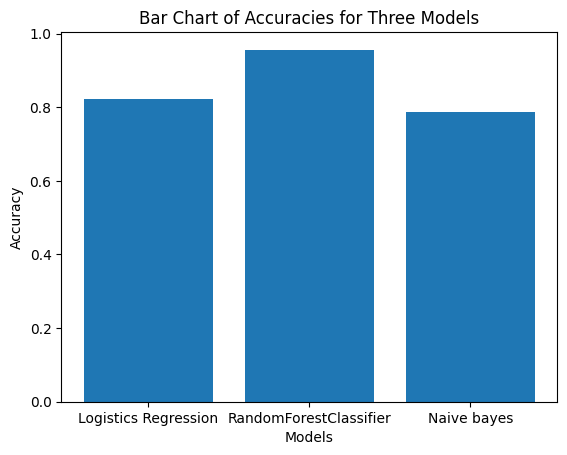

In [67]:
model_names = ['Logistics Regression', 'RandomForestClassifier', 'Naive bayes']
accuracies = np.array([accuracy_downsampled_logistic, accuracy_downsampled_random, accuracy_downsampled_nb])

# Creating a bar chart
plt.bar(model_names, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Bar Chart of Accuracies for Three Models")
plt.show()

In [68]:
x_prob=df_down.drop('is_fraud',axis=1)

In [69]:

y_1= r_g.predict_proba(x_prob)
df_down['fraud_score']=y_1[:,1]
y_2=lg_down.predict(x_prob)
df_down['fraud']=y_2

In [70]:
df_down[df_down['fraud_score']>0.5]

,category,amt,gender,state,city_pop,Avg. Transaction Freq. Per day,Avg. Transaction Freq. Per week,Avg. Transaction Freq. Per month,Transaction velocity,is_fraud,age,hour,day,month,fraud_score,fraud
811262,3,-0.892924,1,35,0.293586,0.109846,0.109846,0.109846,2,0,-1.829676,-0.850945,0.847265,1.495281,0.65,0
228596,6,2.549280,0,17,-2.140051,-0.386534,-0.386534,-0.386534,2,0,1.222568,0.909396,-0.061620,-0.685540,0.74,1
114966,8,2.549280,0,37,0.290329,-1.051151,-1.051151,-1.051151,2,0,2.086411,-1.144336,-0.516063,-0.958143,0.61,1
233317,10,-0.720027,0,38,0.286854,-1.089462,-1.089462,-1.089462,2,0,-0.793065,1.349482,0.847265,-0.685540,0.83,0
993231,5,-1.043973,1,23,0.294006,-1.004511,-1.004511,-1.004511,2,0,1.798464,1.496177,1.301708,-1.230746,0.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047089,8,2.549280,0,41,0.293335,0.986008,0.986008,0.986008,0,1,0.070778,-1.437726,-0.970505,-0.958143,0.98,1
1047157,4,2.549280,1,43,0.249494,-1.077802,-1.077802,-1.077802,2,1,-0.620296,-1.291031,-0.970505,-0.958143,0.98,1
1047208,4,2.549280,0,41,0.293335,0.986008,0.986008,0.986008,0,1,0.070778,-1.291031,-0.970505,-0.958143,0.93,1
1047521,4,2.549280,0,41,0.293335,0.986008,0.986008,0.986008,0,1,0.070778,-0.704250,-0.970505,-0.958143,0.92,1


#### The model is now performing well with an accuracy of 96%. We have calculated the probability score for the corresponding insatances.

In [74]:
param_grid = {
    'bootstrap': [True,False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [8, 9, 10, 5, 7],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,150, 50]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train_downsampled, y_train_downsampled)
grid_search.best_params_


In [79]:
joblib.dump(r_g, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [80]:
model = joblib.load('random_forest_model.pkl')

In [81]:
def predict(data):
    prediction = model.predict(data)
    return prediction

In [95]:
pred_col=['category', 'amt', 'gender', 'state', 'city_pop',
       'Avg. Transaction Freq. Per day', 'Avg. Transaction Freq. Per week',
       'Avg. Transaction Freq. Per month', 'Transaction velocity', 'age',
       'hour', 'day', 'month']

In [96]:
pred=pd.Series([6,2.549280,0,17,-2.140051,-0.386534,-0.386534,-0.386534,2,1.222568,0.909396,-0.061620,-0.685540])
pred_fin = pred.to_frame().T
pred_fin.columns=pred_col

In [100]:
print(*model.predict(pred_fin))

1
